In [1]:
import pandas as pd

In [2]:
uscon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/complaints.csv')

In [3]:
uscon_df.shape

(10231748, 18)

In [35]:
uscon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231748 entries, 0 to 10231747
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          object        
 14  Company response to consumer  object        
 15  Timely response?              

In [4]:
uscon_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NC,28206,NaN,Consent not provided,Web,2020-03-14,Closed with explanation,Yes,NaN,3567184
1,2020-05-05,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WI,53714,NaN,Consent not provided,Web,2020-05-05,Closed with explanation,Yes,NaN,3637115
2,2019-07-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,usc section 1681 states that there must be wri...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,31210,NaN,Consent provided,Web,2019-07-19,Closed with explanation,Yes,NaN,3311892
3,2019-04-02,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,NaN,NaN,JPMORGAN CHASE & CO.,GA,30088,NaN,Consent not provided,Web,2019-04-02,Closed with monetary relief,Yes,NaN,3199330
4,2020-07-20,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank will not allow me to link my accounts...,NaN,PNC Bank N.A.,NJ,08043,NaN,Consent provided,Web,2020-07-20,Closed with explanation,Yes,NaN,3754536


In [5]:
min_date = uscon_df['Date received'].min()
max_date = uscon_df['Date received'].max()

print(f"Minimum Date received: {min_date}")
print(f"Maximum Date received: {max_date}")

Minimum Date received: 2011-12-01
Maximum Date received: 2025-08-01


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 3 years ago from the maximum date in the dataset
three_years_ago = uscon_df['Date received'].max() - timedelta(days=3*365)

# Filter for the last 3 years and non-null 'Consumer complaint narrative'
filtered_df = uscon_df[(uscon_df['Date received'] >= three_years_ago) & (uscon_df['Consumer complaint narrative'].notna())].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame: {filtered_df.shape}")

# Display the head of the filtered DataFrame
display(filtered_df.head())

Shape of the filtered DataFrame: (2064580, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [ ]:
filtered_df.shape

(2064580, 18)

In [12]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects if not already done
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 2 years ago from the maximum date in the dataset
two_years_ago = uscon_df['Date received'].max() - timedelta(days=2*365)

# Filter for the last 2 years and non-null 'Consumer complaint narrative', 'Product', and 'Sub-product'
filtered_df_2years = uscon_df[
    (uscon_df['Date received'] >= two_years_ago) &
    (uscon_df['Consumer complaint narrative'].notna()) &
    (uscon_df['Product'].notna()) &
    (uscon_df['Sub-product'].notna())
].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): {filtered_df_2years.shape}")

# Display the head of the filtered DataFrame
display(filtered_df_2years.head())

Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): (1627852, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [13]:
filtered_df_2years.shape

(1627852, 18)

In [14]:
unique_products = filtered_df_2years['Product'].unique()
display(unique_products)

array(['Credit reporting or other personal consumer reports',
       'Credit card', 'Checking or savings account', 'Debt collection',
       'Mortgage', 'Money transfer, virtual currency, or money service',
       'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Vehicle loan or lease', 'Debt or credit management',
       'Prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card'], dtype=object)

In [15]:
unique_products_list = filtered_df_2years['Product'].unique().tolist()
print(unique_products_list)

['Credit reporting or other personal consumer reports', 'Credit card', 'Checking or savings account', 'Debt collection', 'Mortgage', 'Money transfer, virtual currency, or money service', 'Student loan', 'Payday loan, title loan, personal loan, or advance loan', 'Vehicle loan or lease', 'Debt or credit management', 'Prepaid card', 'Credit reporting, credit repair services, or other personal consumer reports', 'Payday loan, title loan, or personal loan', 'Credit card or prepaid card']


In [16]:
product_counts = filtered_df_2years['Product'].value_counts()
display(product_counts)

,count
Product,
Credit reporting or other personal consumer reports,1194099
Debt collection,127841
Checking or savings account,68407
"Money transfer, virtual currency, or money service",66019
Credit card,65867
"Credit reporting, credit repair services, or other personal consumer reports",25937
Mortgage,23490
Student loan,18598
Vehicle loan or lease,15189


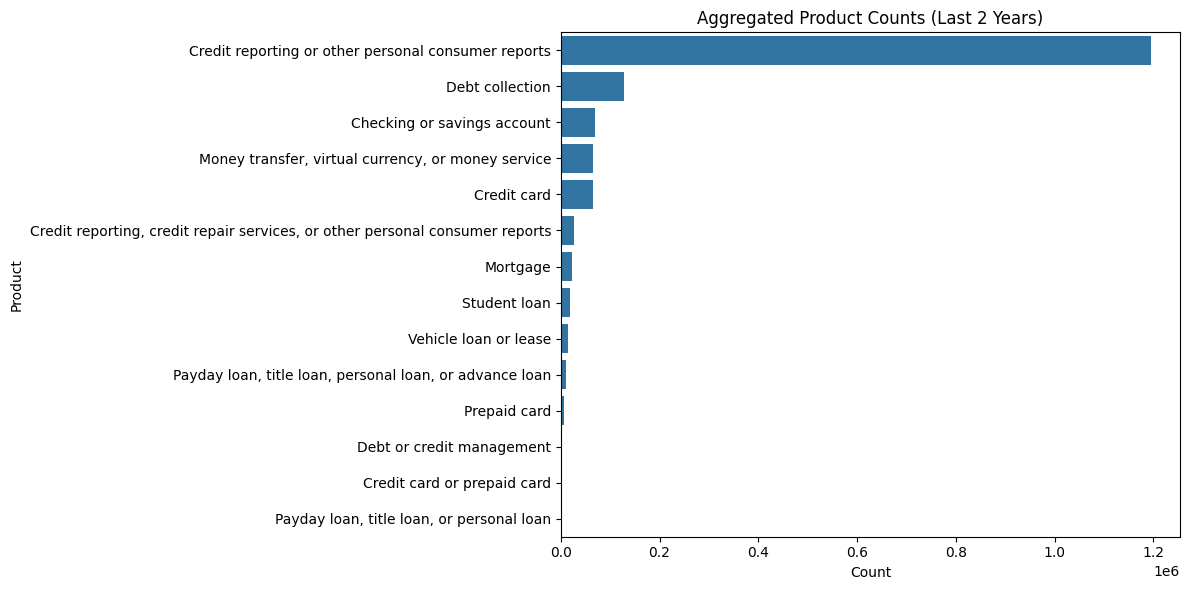

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for aggregated product count
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Aggregated Product Counts (Last 2 Years)')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

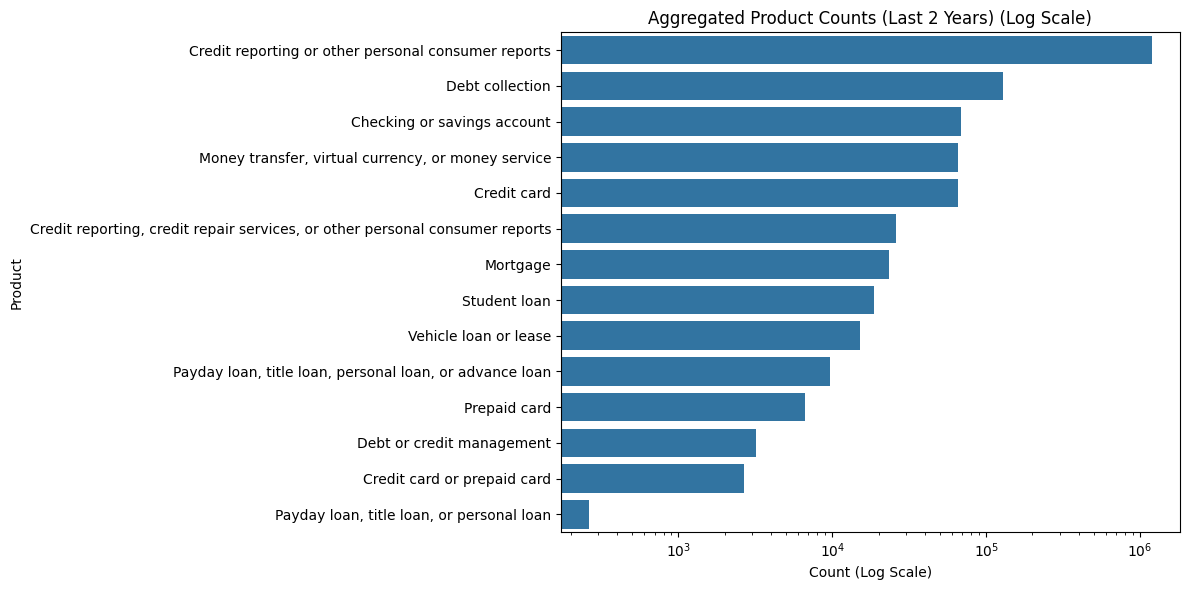

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for aggregated product count
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Aggregated Product Counts (Last 2 Years) (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Product')
plt.xscale('log') # Set x-axis to logarithmic scale
plt.tight_layout()
plt.show()

In [ ]:
product_subproduct_counts = filtered_df_2years.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')
display(product_subproduct_counts)

,Product,Sub-product,Count
0,Checking or savings account,CD (Certificate of Deposit),1257
1,Checking or savings account,Checking account,56352
2,Checking or savings account,Other banking product or service,5301
3,Checking or savings account,Savings account,5497
4,Credit card,General-purpose credit card or charge card,57187
...,...,...,...
69,Prepaid card,Student prepaid card,8
70,Student loan,Federal student loan servicing,15097
71,Student loan,Private student loan,3501
72,Vehicle loan or lease,Lease,2079


In [ ]:
product_subproduct_counts = filtered_df_2years.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by='Count', ascending=False)
display(product_subproduct_counts_sorted)

,Product,Sub-product,Count
13,Credit reporting or other personal consumer re...,Credit reporting,1185491
4,Credit card,General-purpose credit card or charge card,57187
1,Checking or savings account,Checking account,56352
21,Debt collection,I do not know,54201
35,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,47896
...,...,...,...
34,"Money transfer, virtual currency, or money ser...",Debt settlement,7
10,Credit card or prepaid card,Payroll card,7
39,"Money transfer, virtual currency, or money ser...",Money order,6
53,"Payday loan, title loan, or personal loan",Pawn loan,2


In [20]:
# Get the top 10 products based on their counts
top_10_products = filtered_df_2years['Product'].value_counts().head(10).index.tolist()

# Create a new DataFrame with only the top 10 products
filtered_df_top10_products = filtered_df_2years[filtered_df_2years['Product'].isin(top_10_products)].copy()

# Display the shape and head of the new DataFrame
print(f"Shape of the filtered DataFrame with top 10 products: {filtered_df_top10_products.shape}")
display(filtered_df_top10_products.head())

Shape of the filtered DataFrame with top 10 products: (1615072, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


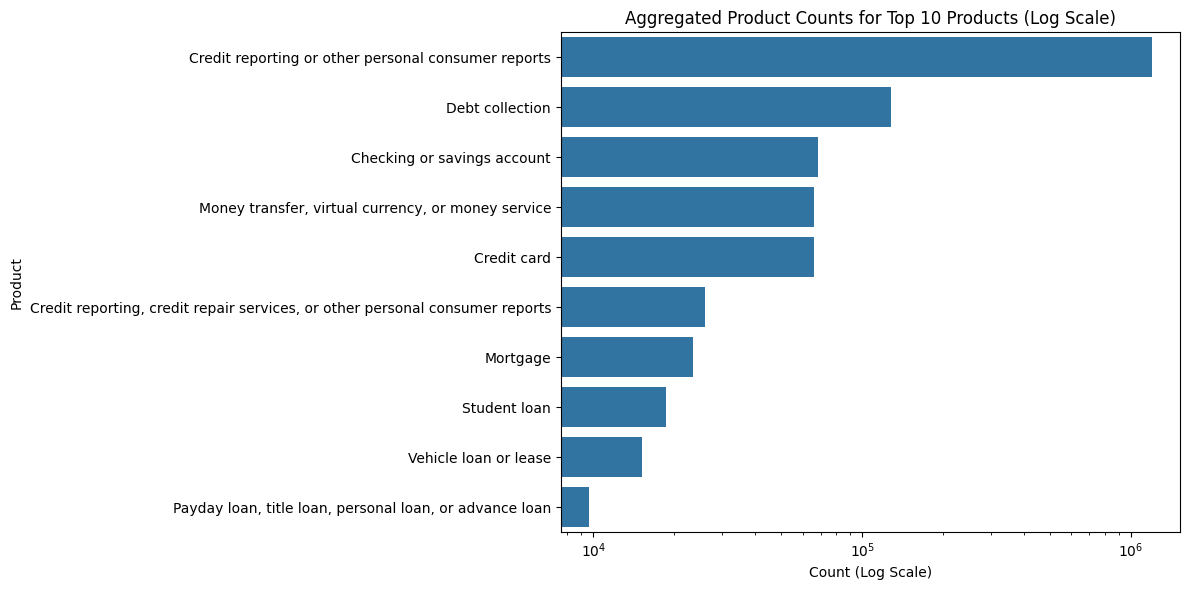

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate product counts for the top 10 products
top10_product_counts = filtered_df_top10_products['Product'].value_counts()

# Create a bar chart with log scale on the x-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_product_counts.values, y=top10_product_counts.index)
plt.title('Aggregated Product Counts for Top 10 Products (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Product')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.tight_layout()
plt.show()

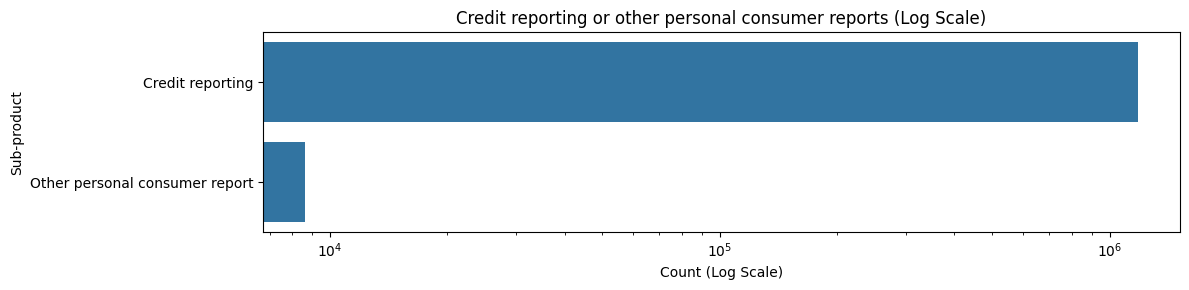

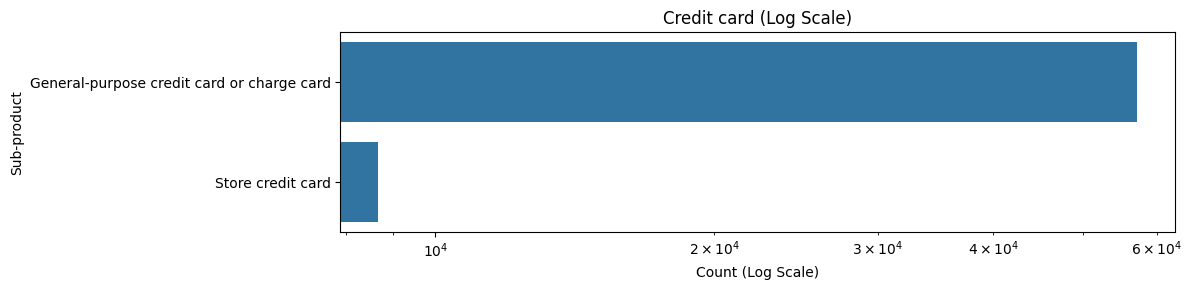

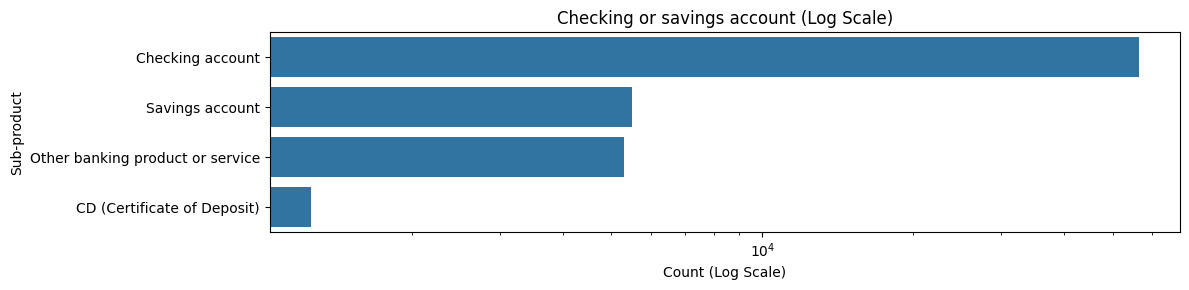

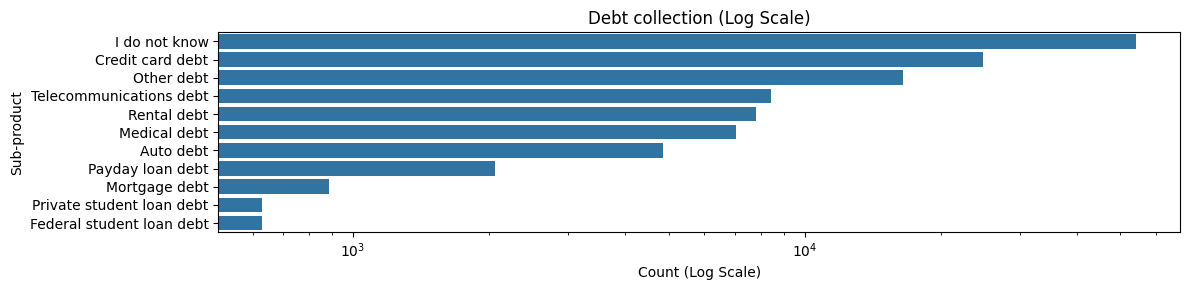

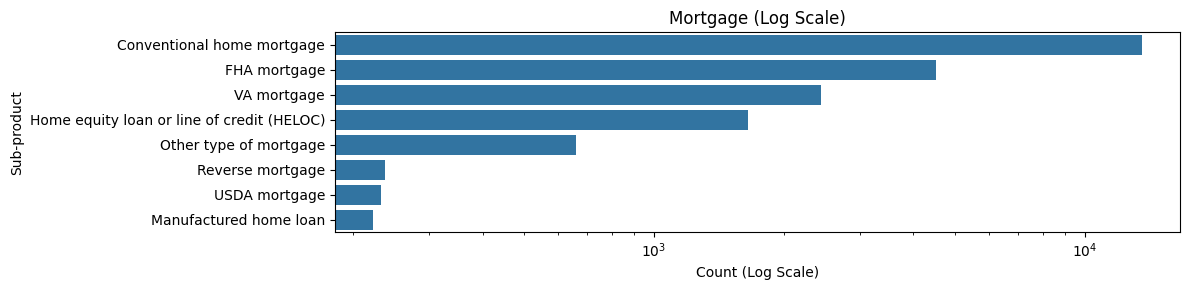

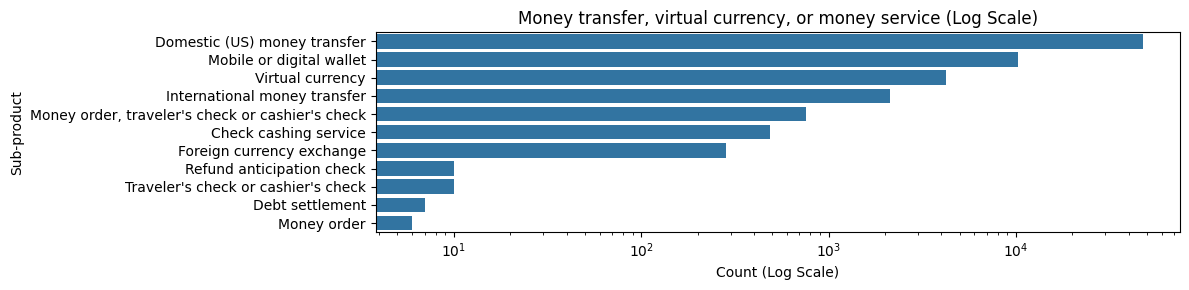

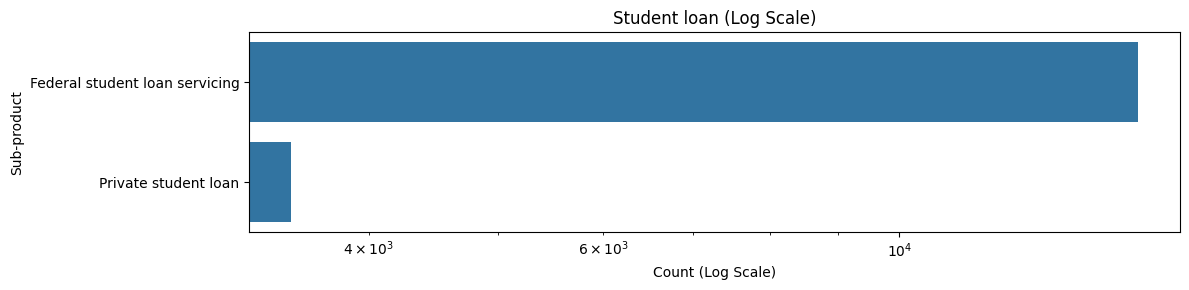

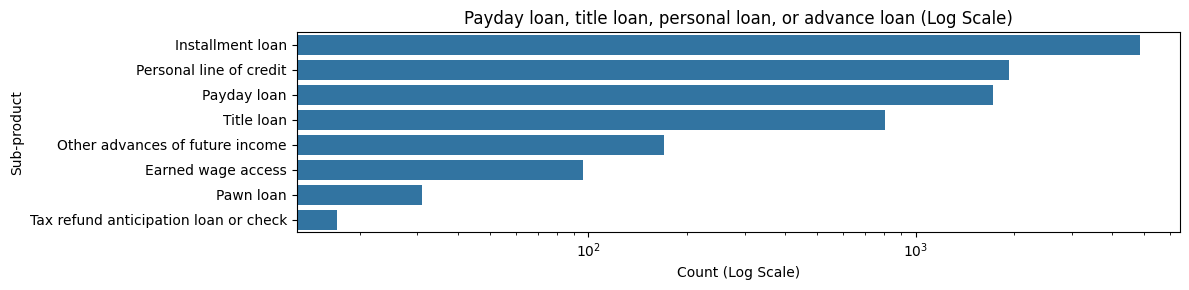

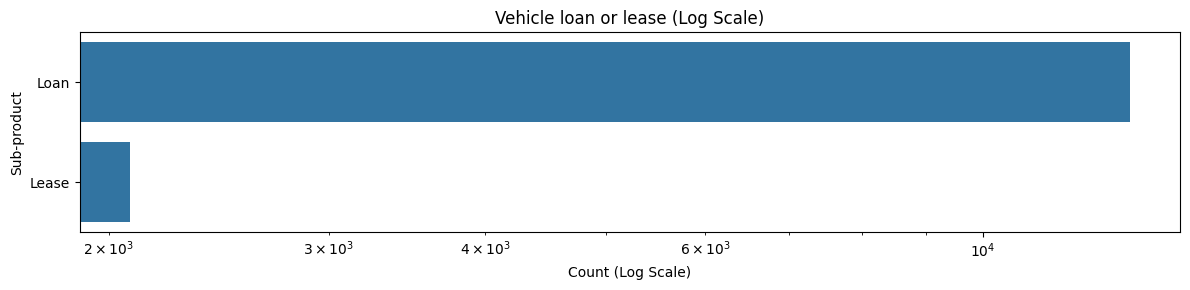

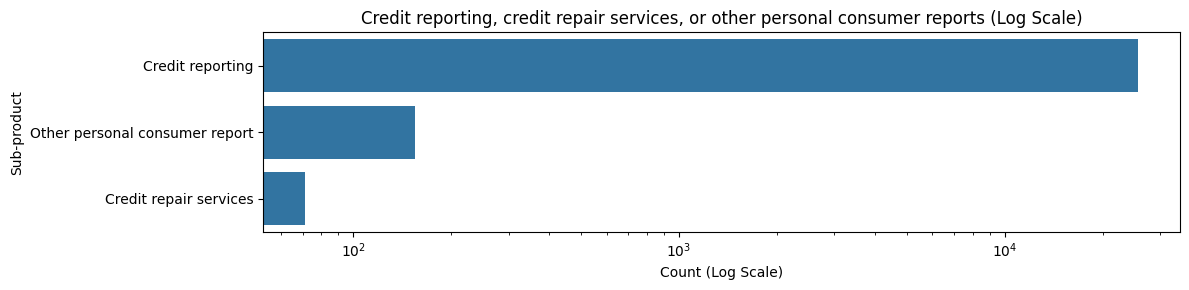

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of top 10 products
top_10_products = filtered_df_top10_products['Product'].unique()

# Iterate through each of the top 10 products
for product in top_10_products:
    # Filter the DataFrame for the current product
    product_df = filtered_df_top10_products[filtered_df_top10_products['Product'] == product].copy()

    # Group by Sub-product and count occurrences
    subproduct_counts = product_df['Sub-product'].value_counts().reset_index(name='Count')
    subproduct_counts = subproduct_counts.sort_values(by='Count', ascending=False)

    # Create a bar chart with log scale on the x-axis
    plt.figure(figsize=(12, 3))
    sns.barplot(x='Count', y='Sub-product', data=subproduct_counts)
    plt.title(f'{product} (Log Scale)')
    plt.xlabel('Count (Log Scale)')
    plt.ylabel('Sub-product')
    plt.xscale('log') # Set x-axis to logarithmic scale
    plt.tight_layout()
    plt.show()

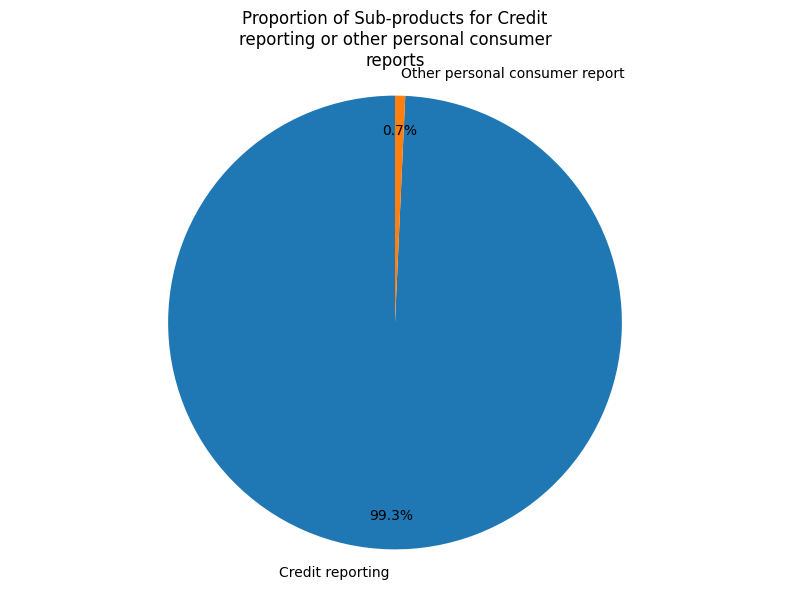

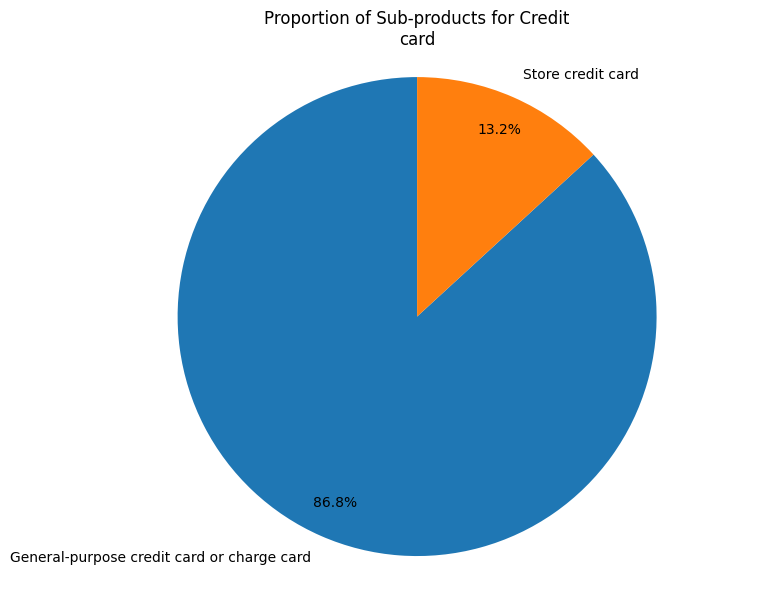

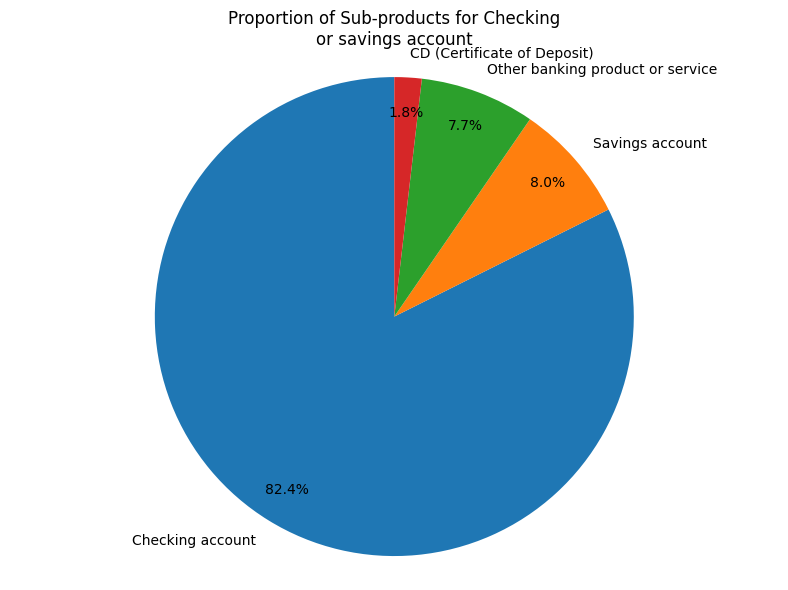

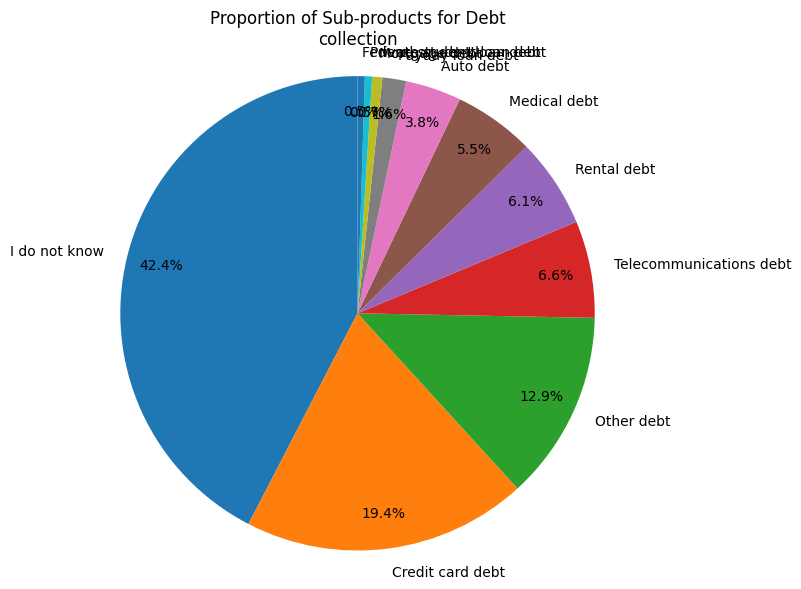

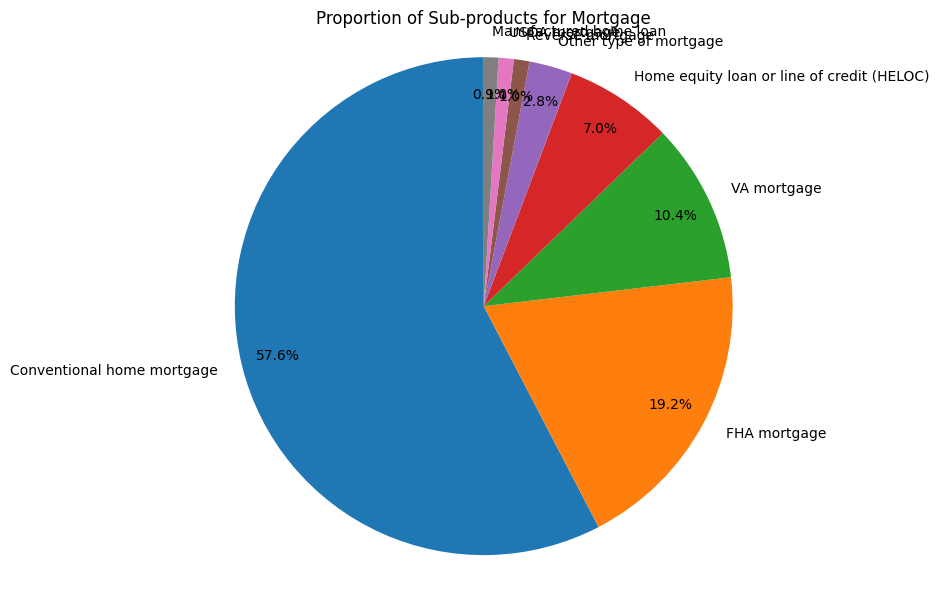

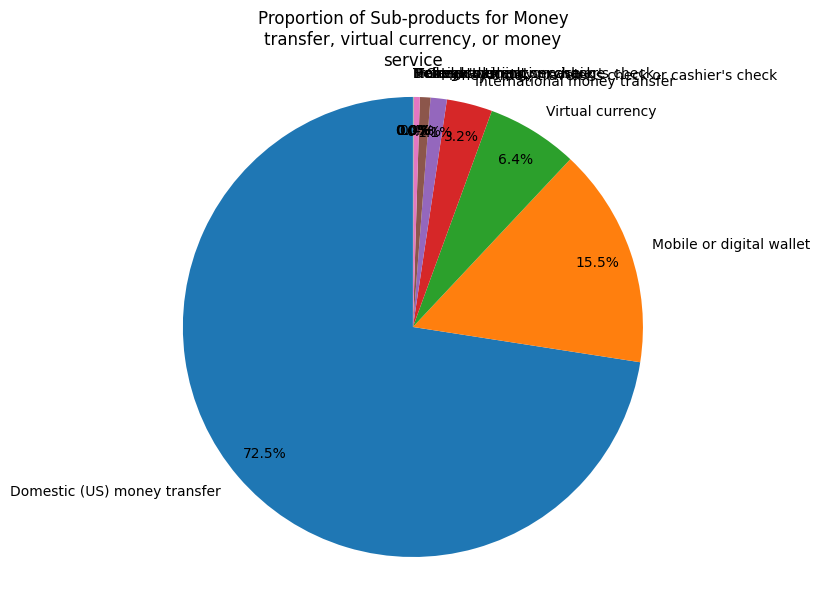

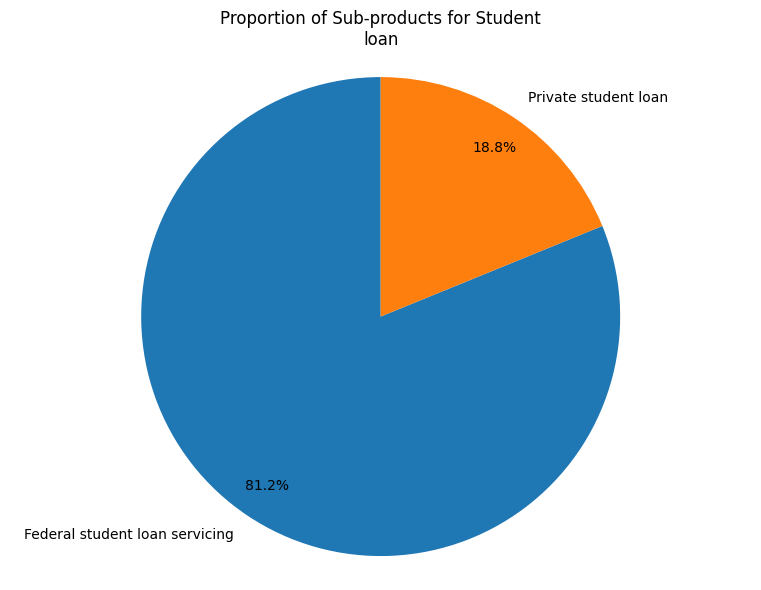

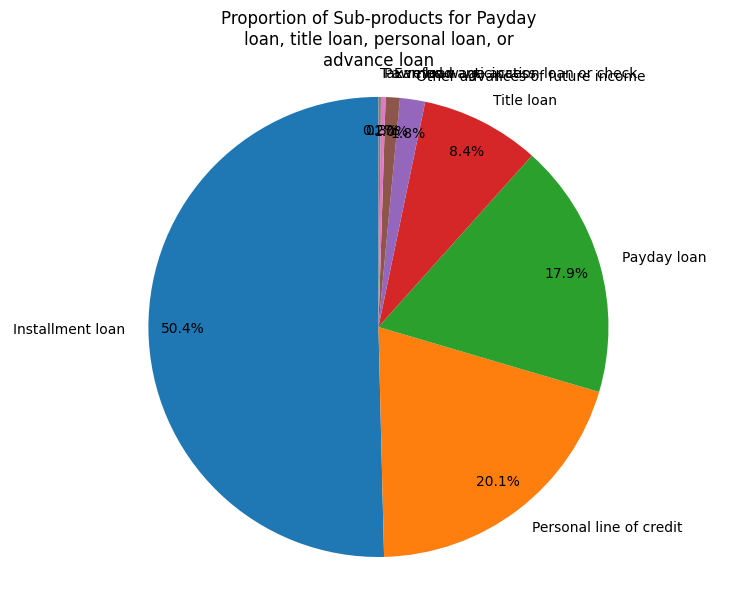

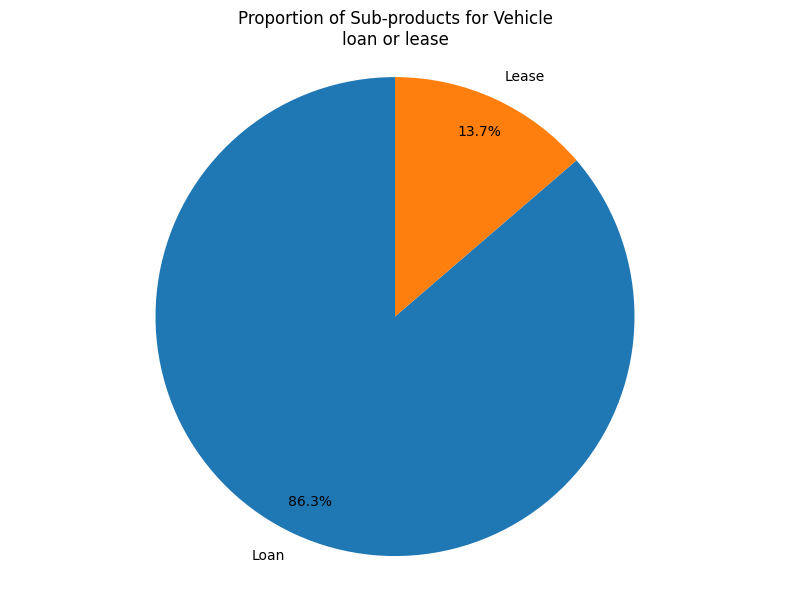

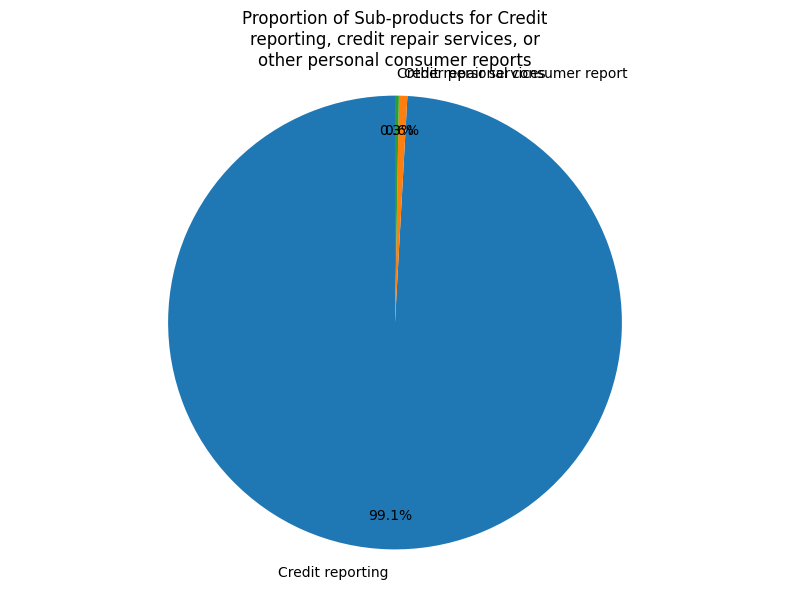

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Get the list of top 10 products
top_10_products = filtered_df_top10_products['Product'].unique()

# Iterate through each of the top 10 products
for product in top_10_products:
    # Filter the DataFrame for the current product
    product_df = filtered_df_top10_products[filtered_df_top10_products['Product'] == product].copy()

    # Group by Sub-product and count occurrences
    subproduct_counts = product_df['Sub-product'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6)) # Reduced figure size
    plt.pie(subproduct_counts, labels=subproduct_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    # Wrap the product title
    wrapped_title = textwrap.fill(f'Proportion of Sub-products for {product}', width=40)
    plt.title(wrapped_title)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

In [33]:
# Select the specified columns from filtered_df_top10_products
selected_columns_df_top10 = filtered_df_top10_products[['Complaint ID', 'Date received', 'Consumer complaint narrative', 'Product', 'Sub-product']].copy()

# Display the head of the new DataFrame
display(selected_columns_df_top10.head())

,Complaint ID,Date received,Consumer complaint narrative,Product,Sub-product
54,8953689,2024-05-07,In accordance with the Fair Credit Reporting A...,Credit reporting or other personal consumer re...,Credit reporting
62,8690404,2024-04-03,I filed a dispute for incorrect information on...,Credit reporting or other personal consumer re...,Credit reporting
98,8876207,2024-04-28,"Dear Consumer Financial Protection Bureau, I a...",Credit card,General-purpose credit card or charge card
226,8658524,2024-03-29,"On XX/XX/XXXX, I submitted an online dispute t...",Credit reporting or other personal consumer re...,Credit reporting
275,8625739,2024-03-25,I filed a dispute for incorrect information on...,Credit reporting or other personal consumer re...,Credit reporting


In [34]:
# Get the aggregated count of products from selected_columns_df_top10
top10_product_counts_table = selected_columns_df_top10['Product'].value_counts().reset_index()
top10_product_counts_table.columns = ['Product', 'Count']

# Display the table
display(top10_product_counts_table)

,Product,Count
0,Credit reporting or other personal consumer re...,1194099
1,Debt collection,127841
2,Checking or savings account,68407
3,"Money transfer, virtual currency, or money ser...",66019
4,Credit card,65867
5,"Credit reporting, credit repair services, or o...",25937
6,Mortgage,23490
7,Student loan,18598
8,Vehicle loan or lease,15189
9,"Payday loan, title loan, personal loan, or adv...",9625


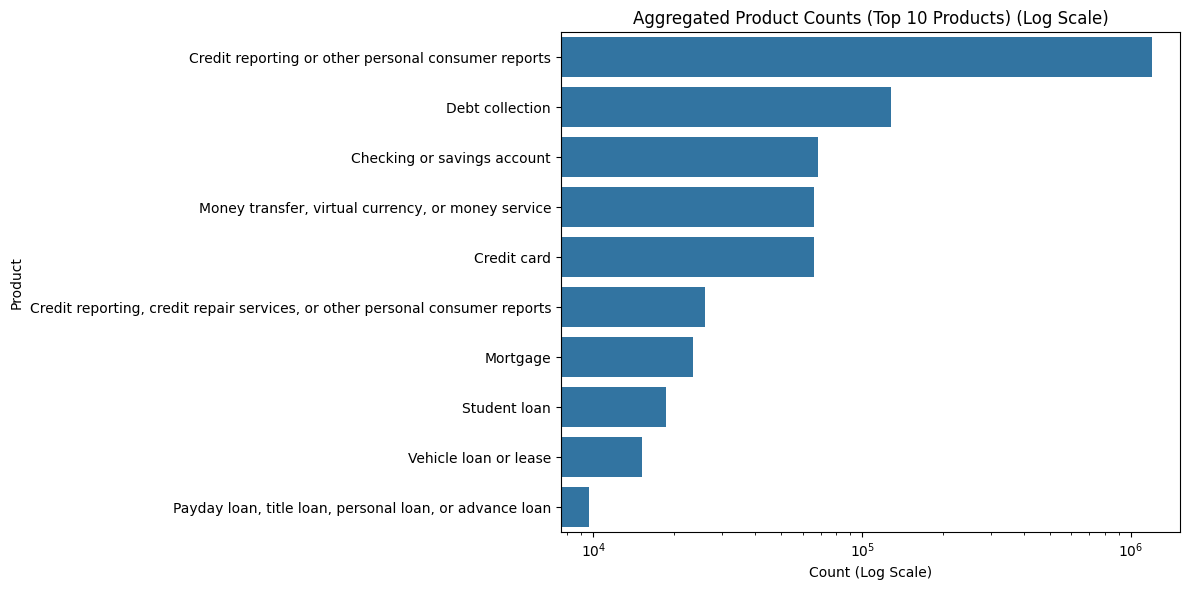

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate product counts from selected_columns_df_top10
product_counts_selected = selected_columns_df_top10['Product'].value_counts()

# Create a bar chart with log scale on the x-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts_selected.values, y=product_counts_selected.index)
plt.title('Aggregated Product Counts (Top 10 Products) (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Product')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.tight_layout()
plt.show()

In [43]:
# Calculate aggregated count of each product
product_counts_agg = filtered_df_top10_products['Product'].value_counts().reset_index()
product_counts_agg.columns = ['Product', 'Product_Count']

# Calculate aggregated count of each sub-product under each product
product_subproduct_counts = filtered_df_top10_products.groupby(['Product', 'Sub-product']).size().reset_index(name='Sub_product_Count')

# Merge the two dataframes to get the desired format
product_subproduct_table = pd.merge(product_subproduct_counts, product_counts_agg, on='Product')

# Reorder columns
product_subproduct_table = product_subproduct_table[['Product', 'Sub-product', 'Product_Count', 'Sub_product_Count']]

# Display the table
display(product_subproduct_table)

,Product,Sub-product,Product_Count,Sub_product_Count
0,Checking or savings account,CD (Certificate of Deposit),68407,1257
1,Checking or savings account,Checking account,68407,56352
2,Checking or savings account,Other banking product or service,68407,5301
3,Checking or savings account,Savings account,68407,5497
4,Credit card,General-purpose credit card or charge card,65867,57187
5,Credit card,Store credit card,65867,8680
6,Credit reporting or other personal consumer re...,Credit reporting,1194099,1185491
7,Credit reporting or other personal consumer re...,Other personal consumer report,1194099,8608
8,"Credit reporting, credit repair services, or o...",Credit repair services,25937,71
9,"Credit reporting, credit repair services, or o...",Credit reporting,25937,25711


In [46]:
filtered_df_top10_products.shape

(1615072, 18)

In [44]:
# Sort the table by Product and then by Sub_product_Count in descending order for better readability
product_subproduct_table_sorted = product_subproduct_table.sort_values(by=['Product', 'Sub_product_Count'], ascending=[True, False])

# Create a list to hold the formatted rows
formatted_rows = []

# Iterate through each product
for product in product_subproduct_table_sorted['Product'].unique():
    # Add the product row with its total count
    product_count = product_subproduct_table_sorted[product_subproduct_table_sorted['Product'] == product]['Product_Count'].iloc[0]
    formatted_rows.append({'Product': product, 'Sub-product': '', 'Product_Count': product_count, 'Sub_product_Count': ''})

    # Filter for sub-products of the current product
    subproducts_df = product_subproduct_table_sorted[product_subproduct_table_sorted['Product'] == product]

    # Add the sub-product rows
    for index, row in subproducts_df.iterrows():
        formatted_rows.append({'Product': '', 'Sub-product': row['Sub-product'], 'Product_Count': '', 'Sub_product_Count': row['Sub_product_Count']})

# Create a new DataFrame from the formatted rows
formatted_product_subproduct_df = pd.DataFrame(formatted_rows)

# Display the formatted table
display(formatted_product_subproduct_df)

,Product,Sub-product,Product_Count,Sub_product_Count
0,Checking or savings account,,68407,
1,,Checking account,,56352
2,,Savings account,,5497
3,,Other banking product or service,,5301
4,,CD (Certificate of Deposit),,1257
...,...,...,...,...
58,,Federal student loan servicing,,15097
59,,Private student loan,,3501
60,Vehicle loan or lease,,15189,
61,,Loan,,13110


In [45]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full table
display(formatted_product_subproduct_df)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,Product,Sub-product,Product_Count,Sub_product_Count
0,Checking or savings account,,68407,
1,,Checking account,,56352
2,,Savings account,,5497
3,,Other banking product or service,,5301
4,,CD (Certificate of Deposit),,1257
5,Credit card,,65867,
6,,General-purpose credit card or charge card,,57187
7,,Store credit card,,8680
8,Credit reporting or other personal consumer re...,,1194099,
9,,Credit reporting,,1185491
